In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [75]:
#Load data 
malaria_data = pd.read_csv('F:/New folder (2)/OneDrive/Desktop/DatasetAfricaMalaria1.csv')


In [76]:
malaria_data

Country Name  Year Country Code  \
0         Algeria  2007          DZA   
1          Angola  2007          AGO   
2           Benin  2007          BEN   
3        Botswana  2007          BWA   
4    Burkina Faso  2007          BFA   
..            ...   ...          ...   
589          Togo  2017          TGO   
590       Tunisia  2017          TUN   
591        Uganda  2017          UGA   
592        Zambia  2017          ZMB   
593      Zimbabwe  2017          ZWE   

     Incidence of malaria (per 1,000 population at risk)  \
0                                                 0.01     
1                                               286.72     
2                                               480.24     
3                                                 1.03     
4                                               503.80     
..                                                 ...     
589                                             278.20     
590                                                NaN     
591                                             336.76     
592                                             160.05     
593                                             108.55     

     Malaria cases reported  Rural population (% of total population)  \
0                      26.0                                     34.65   
1                 1533485.0                                     42.48   
2                       0.0                                     58.44   
3                     390.0                                     42.07   
4                   44246.0                                     77.00   
..                      ...                                       ...   
589               1755577.0                                     58.84   
590                     NaN                                     31.36   
591              11667831.0                                     76.80   
592               5505639.0                                     57.02   
593                467508.0                                     67.76   

     Rural population growth (annual %)  \
0                                 -0.60   
1                                  1.91   
2                                  1.99   
3                                 -1.44   
4                                  2.16   
..                                  ...   
589                                1.58   
590                                0.20   
591                                3.01   
592                                2.01   
593                                1.55   

     Urban population (% of total population)  \
0                                       65.35   
1                                       57.52   
2                                       41.56   
3                                       57.93   
4                                       23.00   
..                                        ...   
589                                     41.16   
590                                     68.64   
591                                     23.20   
592                                     42.98   
593                                     32.24   

     Urban population growth (annual %)  \
0                                  2.71   
1                                  5.01   
2                                  4.09   
3                                  4.80   
4                                  5.91   
..                                  ...   
589                                3.79   
590                                1.57   
591                                6.25   
592                                4.21   
593                                1.28   

     People using at least basic drinking water services (% of population)  \
0                                                91.68                       
1                                                47.96                       
2                                                63.78               

In [77]:
malaria_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country Name                                                                        594 non-null    object 
 1   Year                                                                                594 non-null    int64  
 2   Country Code                                                                        594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                 550 non-null    float64
 4   Malaria cases reported                                                              550 non-null    float64
 5   Rural population (% of total population)                                            588 non-null   

In [78]:
malaria_data.isnull().sum()

Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

<Axes: >

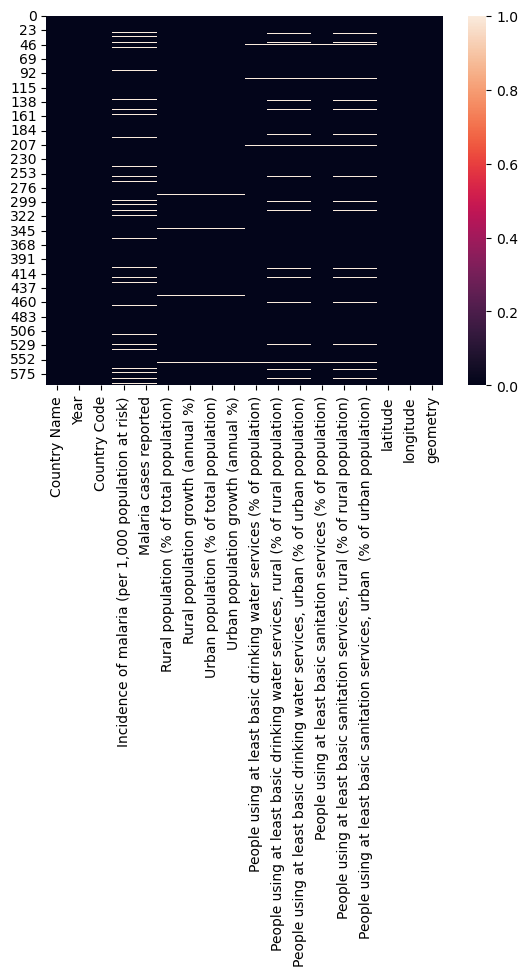

In [79]:
sns.heatmap(malaria_data.isnull())

In [80]:
malaria_data.describe()

Year  Incidence of malaria (per 1,000 population at risk)  \
count   594.000000                                         550.000000     
mean   2012.000000                                         190.087491     
std       3.164943                                         163.054527     
min    2007.000000                                           0.000000     
25%    2009.000000                                          30.857500     
50%    2012.000000                                         174.775000     
75%    2015.000000                                         347.637500     
max    2017.000000                                         585.540000     

       Malaria cases reported  Rural population (% of total population)  \
count            5.500000e+02                                588.000000   
mean             1.068330e+06                                 56.836650   
std              2.192802e+06                                 18.086328   
min              0.000000e+00                                 11.020000   
25%              2.211750e+03                                 43.057500   
50%              1.130260e+05                                 58.445000   
75%              1.154808e+06                                 71.205000   
max              1.682113e+07                                 90.140000   

       Rural population growth (annual %)  \
count                          588.000000   
mean                             1.389371   
std                              1.199693   
min                             -3.450000   
25%                              0.410000   
50%                              1.675000   
75%                              2.130000   
max                              7.090000   

       Urban population (% of total population)  \
count                                588.000000   
mean                                  43.164116   
std                                   18.086118   
min                                    9.860000   
25%                                   28.795000   
50%                                   41.560000   
75%                                   56.945000   
max                                   88.980000   

       Urban population growth (annual %)  \
count                          588.000000   
mean                             3.523061   
std                              1.456244   
min                             -4.650000   
25%                              2.512500   
50%                              3.730000   
75%                              4.450000   
max                              7.400000   

       People using at least basic drinking water services (% of population)  \
count                                         588.000000                       
mean                                           65.994915                       
std                                            17.283361                       
min                                            28.960000                       
25%                                            52.375000                       
50%                                            64.470000                       
75%                                            79.165000                       
max                                            99.870000                       

       People using at least basic drinking water services, rural (% of rural population)  \
count                                         566.000000                                    
mean                                           51.449576                                    
std                                            18.927868                                    
min                                            17.050000                                    
25%                                            37.075000                                    
50%                                            50.435000                                    
75%               

In [81]:
malaria_data.describe().transpose()

count          mean  \
Year                                                594.0  2.012000e+03   
Incidence of malaria (per 1,000 population at r...  550.0  1.900875e+02   
Malaria cases reported                              550.0  1.068330e+06   
Rural population (% of total population)            588.0  5.683665e+01   
Rural population growth (annual %)                  588.0  1.389371e+00   
Urban population (% of total population)            588.0  4.316412e+01   
Urban population growth (annual %)                  588.0  3.523061e+00   
People using at least basic drinking water serv...  588.0  6.599491e+01   
People using at least basic drinking water serv...  566.0  5.144958e+01   
People using at least basic drinking water serv...  566.0  8.426850e+01   
People using at least basic sanitation services...  588.0  3.946980e+01   
People using at least basic sanitation services...  566.0  2.807721e+01   
People using at least basic sanitation services...  566.0  4.808837e+01   
latitude                                            594.0  2.828796e+00   
longitude                                           594.0  1.734255e+01   

                                                             std          min  \
Year                                                3.164943e+00  2007.000000   
Incidence of malaria (per 1,000 population at r...  1.630545e+02     0.000000   
Malaria cases reported                              2.192802e+06     0.000000   
Rural population (% of total population)            1.808633e+01    11.020000   
Rural population growth (annual %)                  1.199693e+00    -3.450000   
Urban population (% of total population)            1.808612e+01     9.860000   
Urban population growth (annual %)                  1.456244e+00    -4.650000   
People using at least basic drinking water serv...  1.728336e+01    28.960000   
People using at least basic drinking water serv...  1.892787e+01    17.050000   
People using at least basic drinking water serv...  9.307285e+00    52.010000   
People using at least basic sanitation services...  2.630493e+01     4.990000   
People using at least basic sanitation services...  2.404673e+01     1.890000   
People using at least basic sanitation services...  2.180213e+01    12.580000   
latitude                                            1.567823e+01   -30.559482   
longitude                                           2.004126e+01   -24.013197   

                                                            25%  \
Year                                                2009.000000   
Incidence of malaria (per 1,000 population at r...    30.857500   
Malaria cases reported                              2211.750000   
Rural population (% of total population)              43.057500   
Rural population growth (annual %)                     0.410000   
Urban population (% of total population)              28.795000   
Urban population growth (annual %)                     2.512500   
People using at least basic drinking water serv...    52.375000   
People using at least basic drinking water serv...    37.075000   
People using at least basic drinking water serv...    78.080000   
People using at least basic sanitation services...    18.197500   
People using at least basic sanitation services...     8.842500   
People using at least basic sanitation services...    30.775000   
latitude                                              -6.369028   
longitude                                              0.824782   

                                                              50%  \
Year                                                  2012.000000   
Incidence of malaria (per 1,000 population at r...     174.775000   
Malaria cases reported                              113026.000000   
Rural population (% of total population)                58.445000   
Rural population growth (annual %)                       1.675000   
Urban population (% of total population)                41.560000  

In [82]:
unique = malaria_data['Country Name'].unique()
unique

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [83]:
#CHECKING THE DATASET FOR NULL VALUES
malaria_data.isnull().sum()

Country Name                                                                           0
Year                                                                                   0
Country Code                                                                           0
Incidence of malaria (per 1,000 population at risk)                                   44
Malaria cases reported                                                                44
Rural population (% of total population)                                               6
Rural population growth (annual %)                                                     6
Urban population (% of total population)                                               6
Urban population growth (annual %)                                                     6
People using at least basic drinking water services (% of population)                  6
People using at least basic drinking water services, rural (% of rural population)    28
People using at least

In [84]:
#FINDING THE MEAN, MODE, MEDIAN
print(malaria_data['Urban population (% of total population)'].mode())
print(malaria_data['Urban population (% of total population)'].mean())
print(malaria_data['Urban population (% of total population)'].median())

0    16.22
1    16.23
2    16.93
3    34.40
4    41.56
5    42.95
Name: Urban population (% of total population), dtype: float64
43.1641156462585
41.56


In [85]:
#FILLING NULL VALUE WITH MEAN VALUE
malaria_data['Urban population (% of total population)'].fillna(malaria_data['Urban population (% of total population)'].mean(),inplace=True)

In [86]:
malaria_data['Incidence of malaria (per 1,000 population at risk)'].fillna(malaria_data['Incidence of malaria (per 1,000 population at risk)'].mean(),inplace=True)

In [87]:
malaria_data['Malaria cases reported'].fillna(malaria_data['Malaria cases reported'].mean(),inplace=True)

In [88]:
malaria_data['Rural population (% of total population)'].fillna(malaria_data['Rural population (% of total population)'].mean(),inplace=True)

In [89]:
malaria_data['Rural population growth (annual %)'].fillna(malaria_data['Rural population growth (annual %)'].mean(),inplace=True)

In [90]:
malaria_data['People using at least basic drinking water services (% of population)'].fillna(malaria_data['People using at least basic drinking water services (% of population)'].mean(),inplace=True)

In [91]:
malaria_data['People using at least basic drinking water services, rural (% of rural population)'].fillna(malaria_data['People using at least basic drinking water services, rural (% of rural population)'].mean(),inplace=True)

In [92]:
malaria_data['People using at least basic drinking water services, urban (% of urban population)'].fillna(malaria_data['People using at least basic drinking water services, urban (% of urban population)'].mean(),inplace=True)

In [93]:
malaria_data['People using at least basic sanitation services (% of population)'].fillna(malaria_data['People using at least basic sanitation services (% of population)'].mean(),inplace=True)

In [94]:
malaria_data['People using at least basic sanitation services, rural (% of rural population)'].fillna(malaria_data['People using at least basic sanitation services, rural (% of rural population)'].mean(),inplace=True)

In [95]:
malaria_data['People using at least basic sanitation services, urban  (% of urban population)'].fillna(malaria_data['People using at least basic sanitation services, urban  (% of urban population)'].mean(),inplace=True)

In [96]:
malaria_data['Urban population growth (annual %)'].fillna(malaria_data['Urban population growth (annual %)'].mean(),inplace=True)

In [97]:
#CHECKING THE DATASET FOR NULL VALUES
malaria_data.isnull().sum()

Country Name                                                                          0
Year                                                                                  0
Country Code                                                                          0
Incidence of malaria (per 1,000 population at risk)                                   0
Malaria cases reported                                                                0
Rural population (% of total population)                                              0
Rural population growth (annual %)                                                    0
Urban population (% of total population)                                              0
Urban population growth (annual %)                                                    0
People using at least basic drinking water services (% of population)                 0
People using at least basic drinking water services, rural (% of rural population)    0
People using at least basic drin

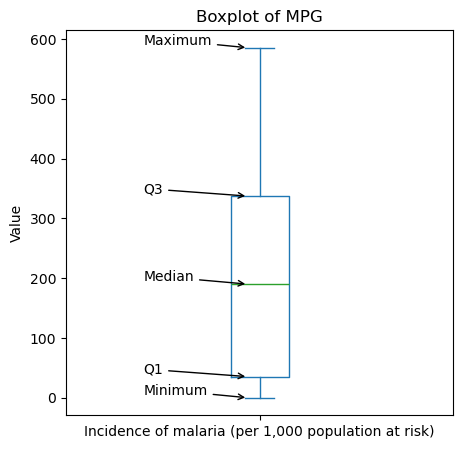

In [98]:
# Plot the boxplot
malaria_data['Incidence of malaria (per 1,000 population at risk)'].plot.box(figsize=(5,5))

# Add title and axis labels
plt.title('Boxplot of MPG')
plt.ylabel('Value')

# Annotate the boxplot
plt.annotate('Minimum', xy=(0.97, malaria_data['Incidence of malaria (per 1,000 population at risk)'].min()), xytext=(0.7,malaria_data['Incidence of malaria (per 1,000 population at risk)'].min()+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Q1', xy=(0.97, malaria_data['Incidence of malaria (per 1,000 population at risk)'].quantile(0.25)), xytext=(0.7, malaria_data['Incidence of malaria (per 1,000 population at risk)'].quantile(0.25)+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Median', xy=(0.97, malaria_data['Incidence of malaria (per 1,000 population at risk)'].median()), xytext=(0.7,malaria_data['Incidence of malaria (per 1,000 population at risk)'].median()+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Q3', xy=(0.97,malaria_data['Incidence of malaria (per 1,000 population at risk)'].quantile(0.75)), xytext=(0.7, malaria_data['Incidence of malaria (per 1,000 population at risk)'].quantile(0.75)+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Maximum', xy=(0.97, malaria_data['Incidence of malaria (per 1,000 population at risk)'].max()), xytext=(0.7, malaria_data['Incidence of malaria (per 1,000 population at risk)'].max()+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the plot
plt.show()


F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


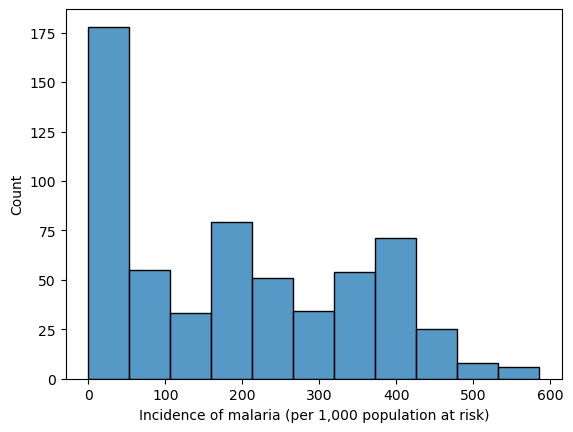

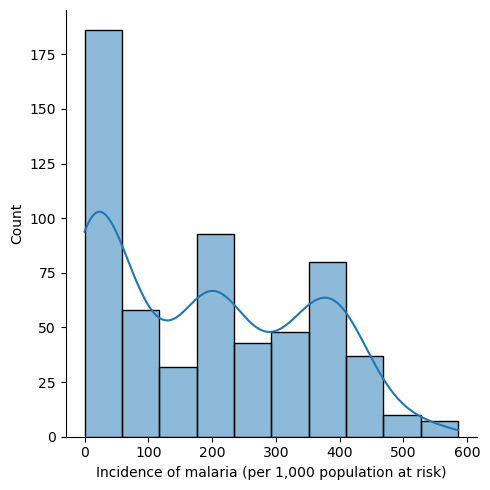

In [99]:
sns.histplot(malaria_data['Incidence of malaria (per 1,000 population at risk)'])
sns.displot(malaria_data['Incidence of malaria (per 1,000 population at risk)'], kde=True, bins=10)

F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


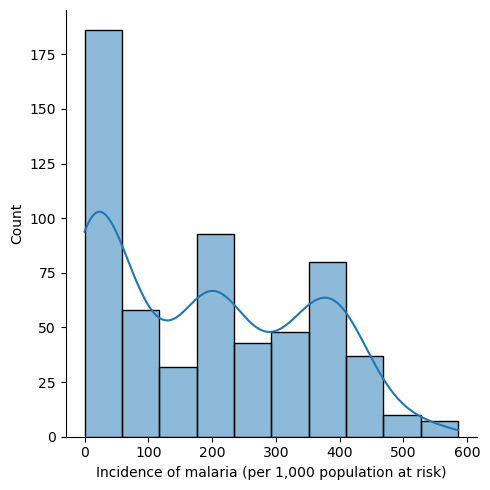

In [100]:
sns.displot(malaria_data['Incidence of malaria (per 1,000 population at risk)'], kde=True, bins=10)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Incidence of malaria (per 1,000 population at risk)'}>,
        <Axes: title={'center': 'Malaria cases reported'}>,
        <Axes: title={'center': 'Rural population (% of total population)'}>],
       [<Axes: title={'center': 'Rural population growth (annual %)'}>,
        <Axes: title={'center': 'Urban population (% of total population)'}>,
        <Axes: title={'center': 'Urban population growth (annual %)'}>,
        <Axes: title={'center': 'People using at least basic drinking water services (% of population)'}>],
       [<Axes: title={'center': 'People using at least basic drinking water services, rural (% of rural population)'}>,
        <Axes: title={'center': 'People using at least basic drinking water services, urban (% of urban population)'}>,
        <Axes: title={'center': 'People using at least basic sanitation services (% of population)'}>,
        <Axes: title={'center': 'People using at least ba

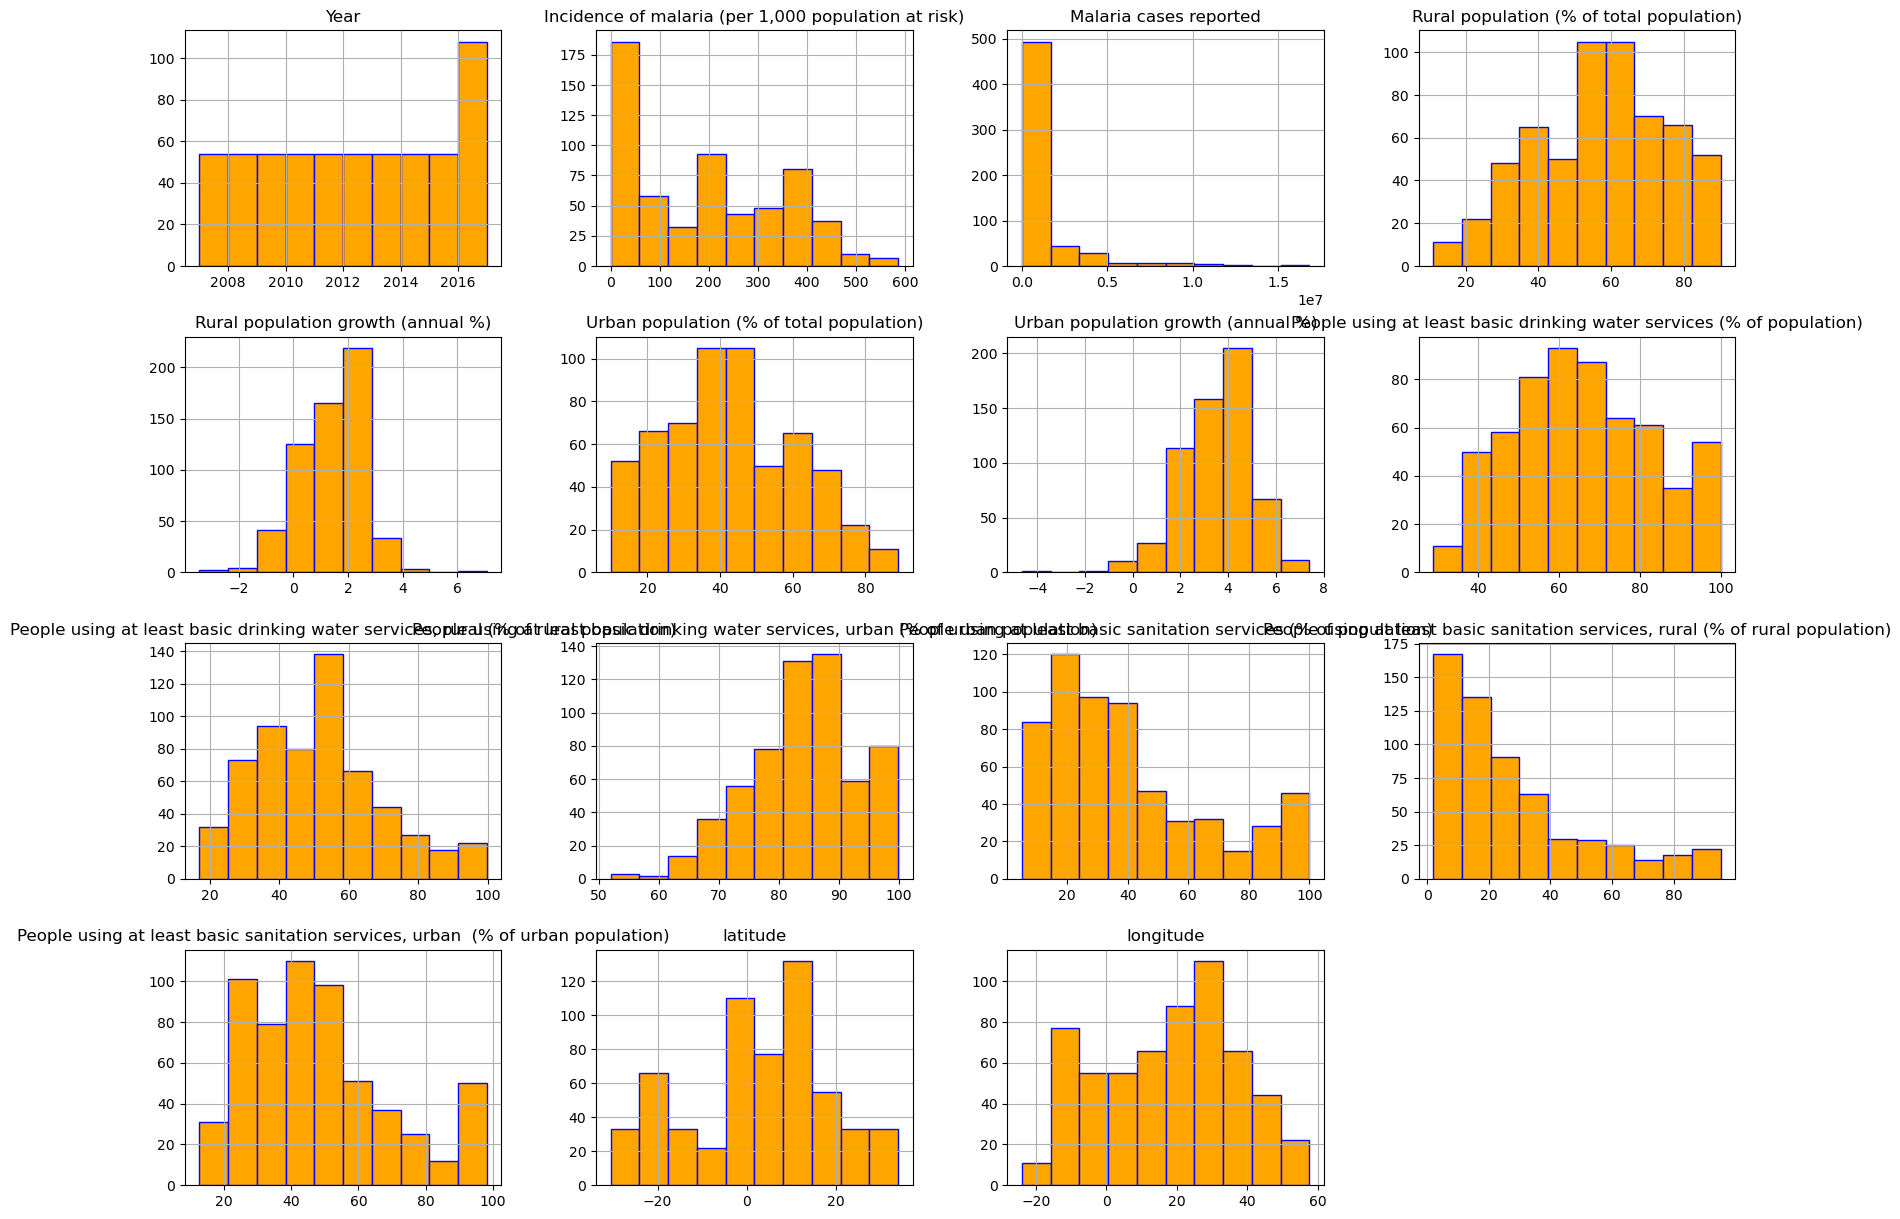

In [101]:
malaria_data.hist(bins=10, edgecolor='blue',color='orange', figsize=(20,15))

F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

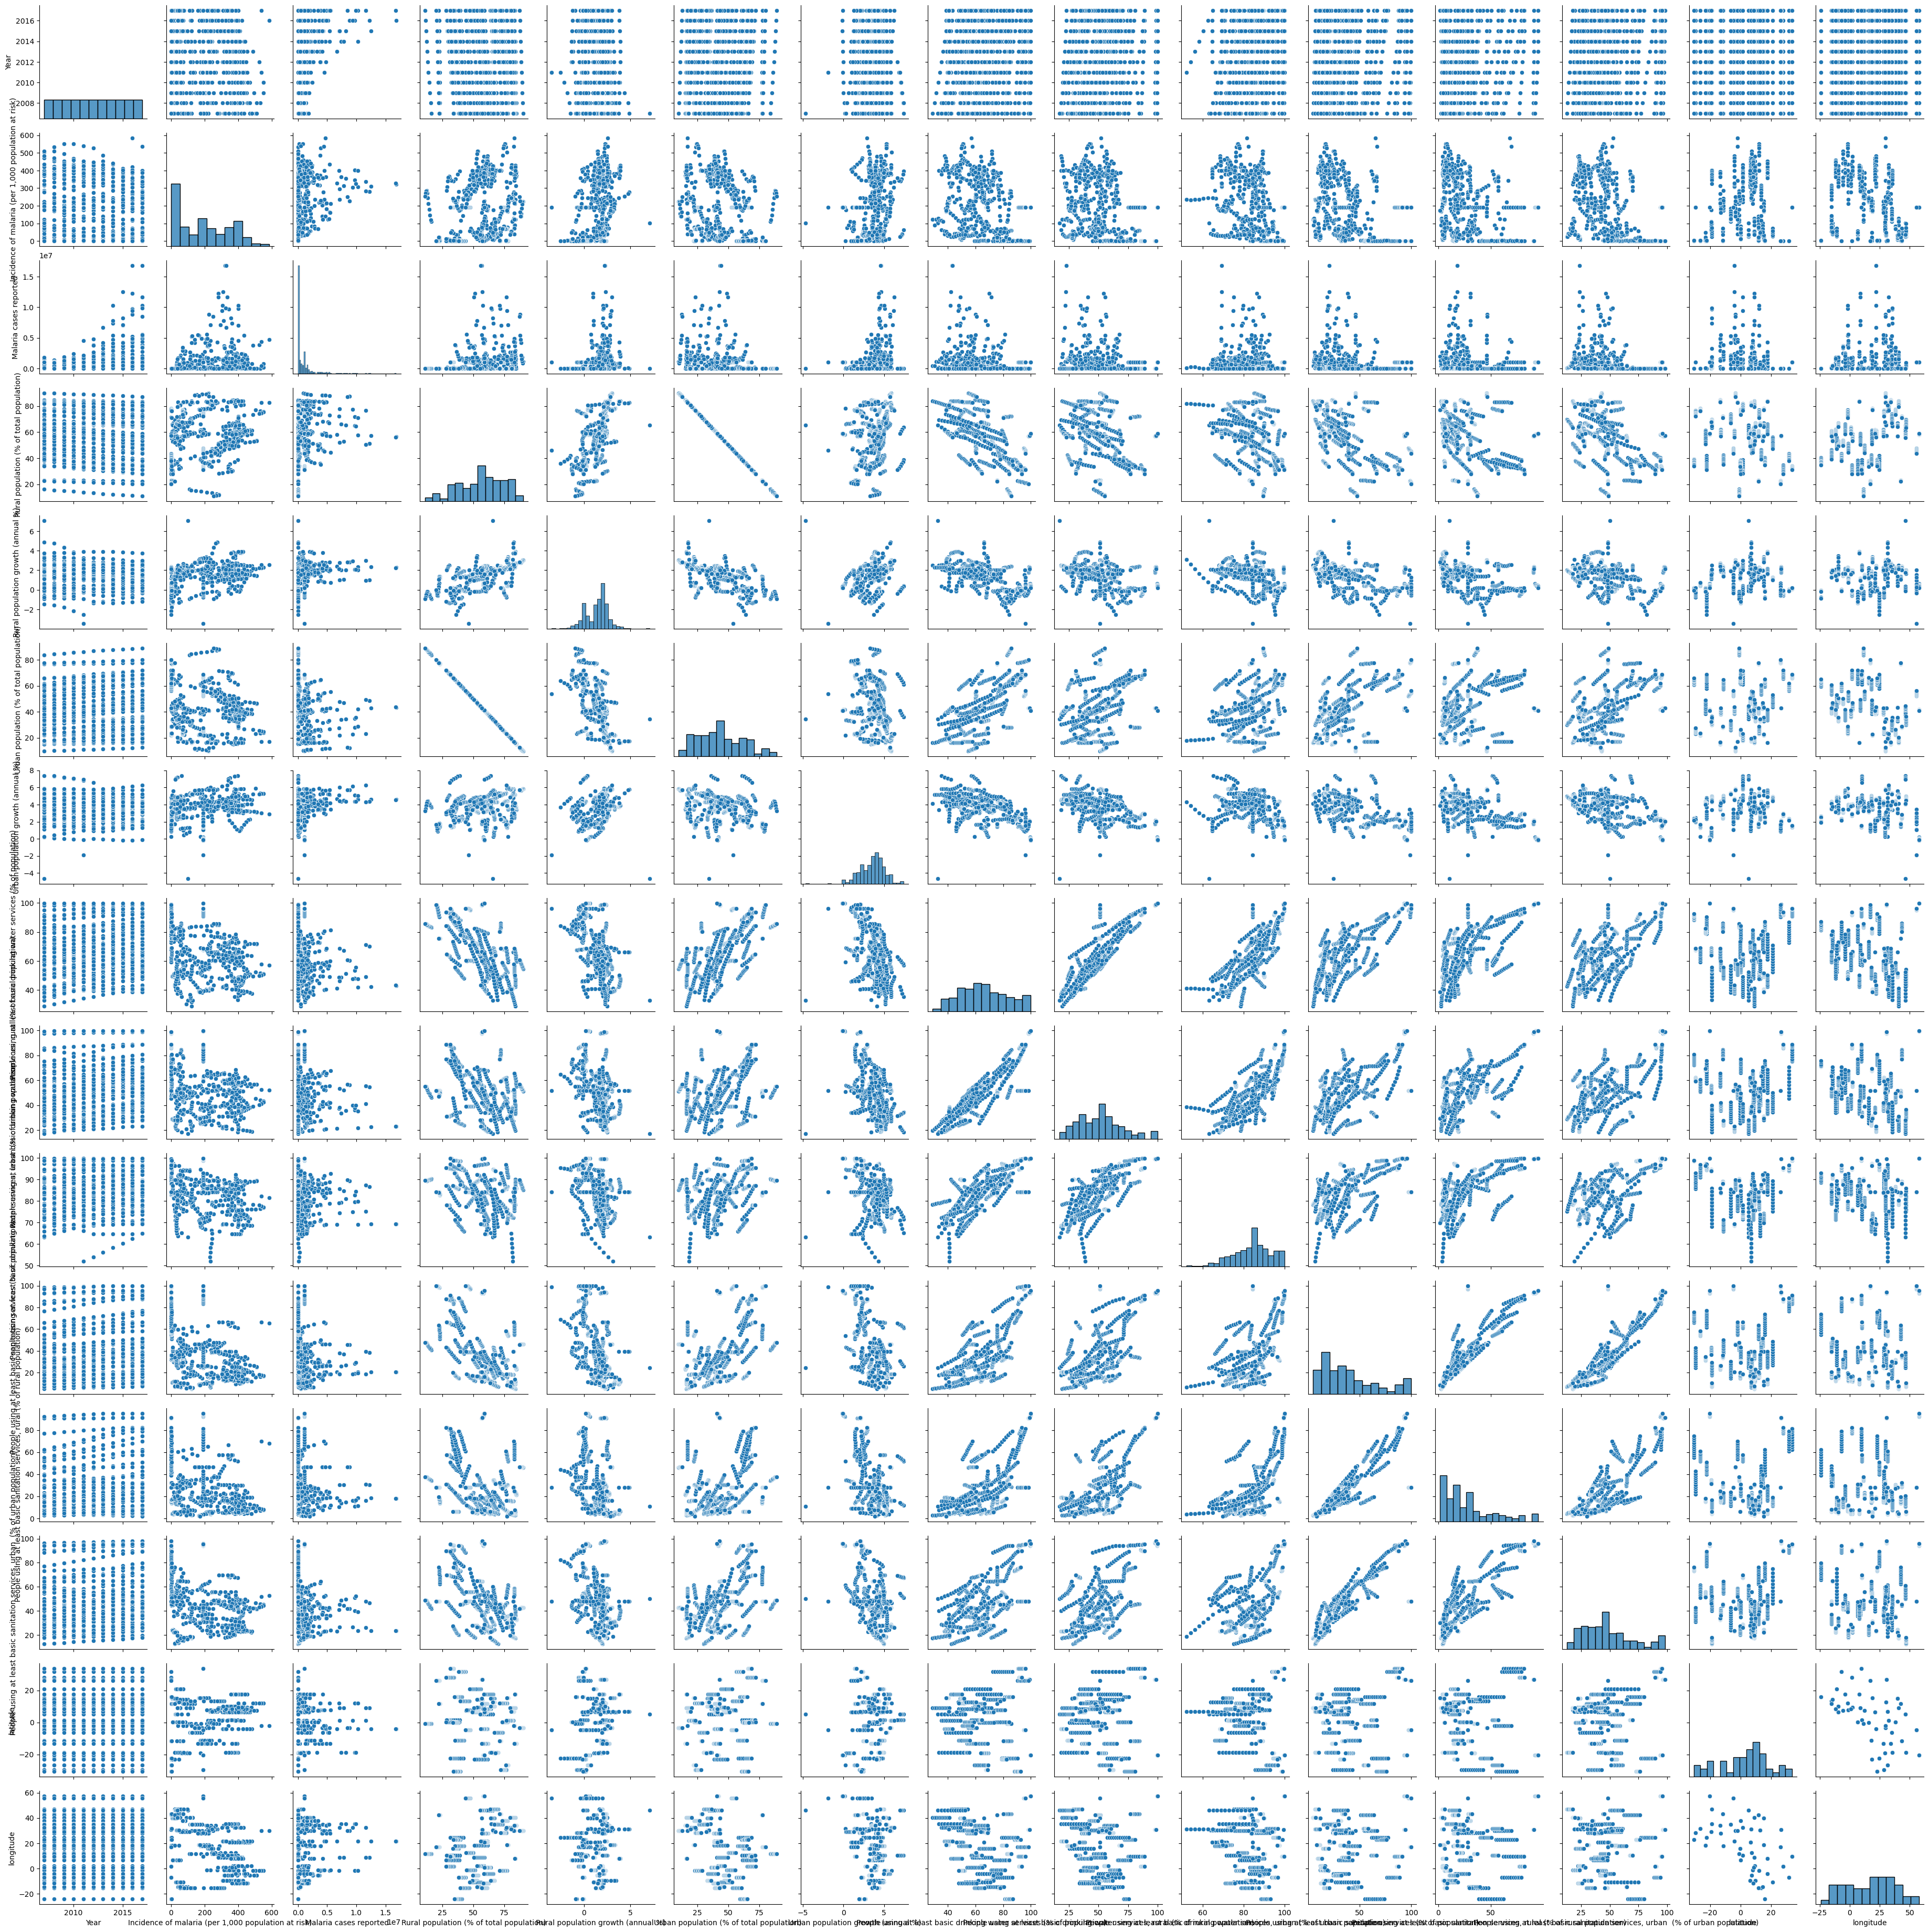

In [102]:
sns.pairplot(malaria_data)

In [104]:
malaria_data=malaria_data.drop('Country Name',axis=1)

In [106]:
malaria_data=malaria_data.drop('Country Code',axis=1)

In [108]:
malaria_data=malaria_data.drop('geometry',axis=1)

<Axes: >

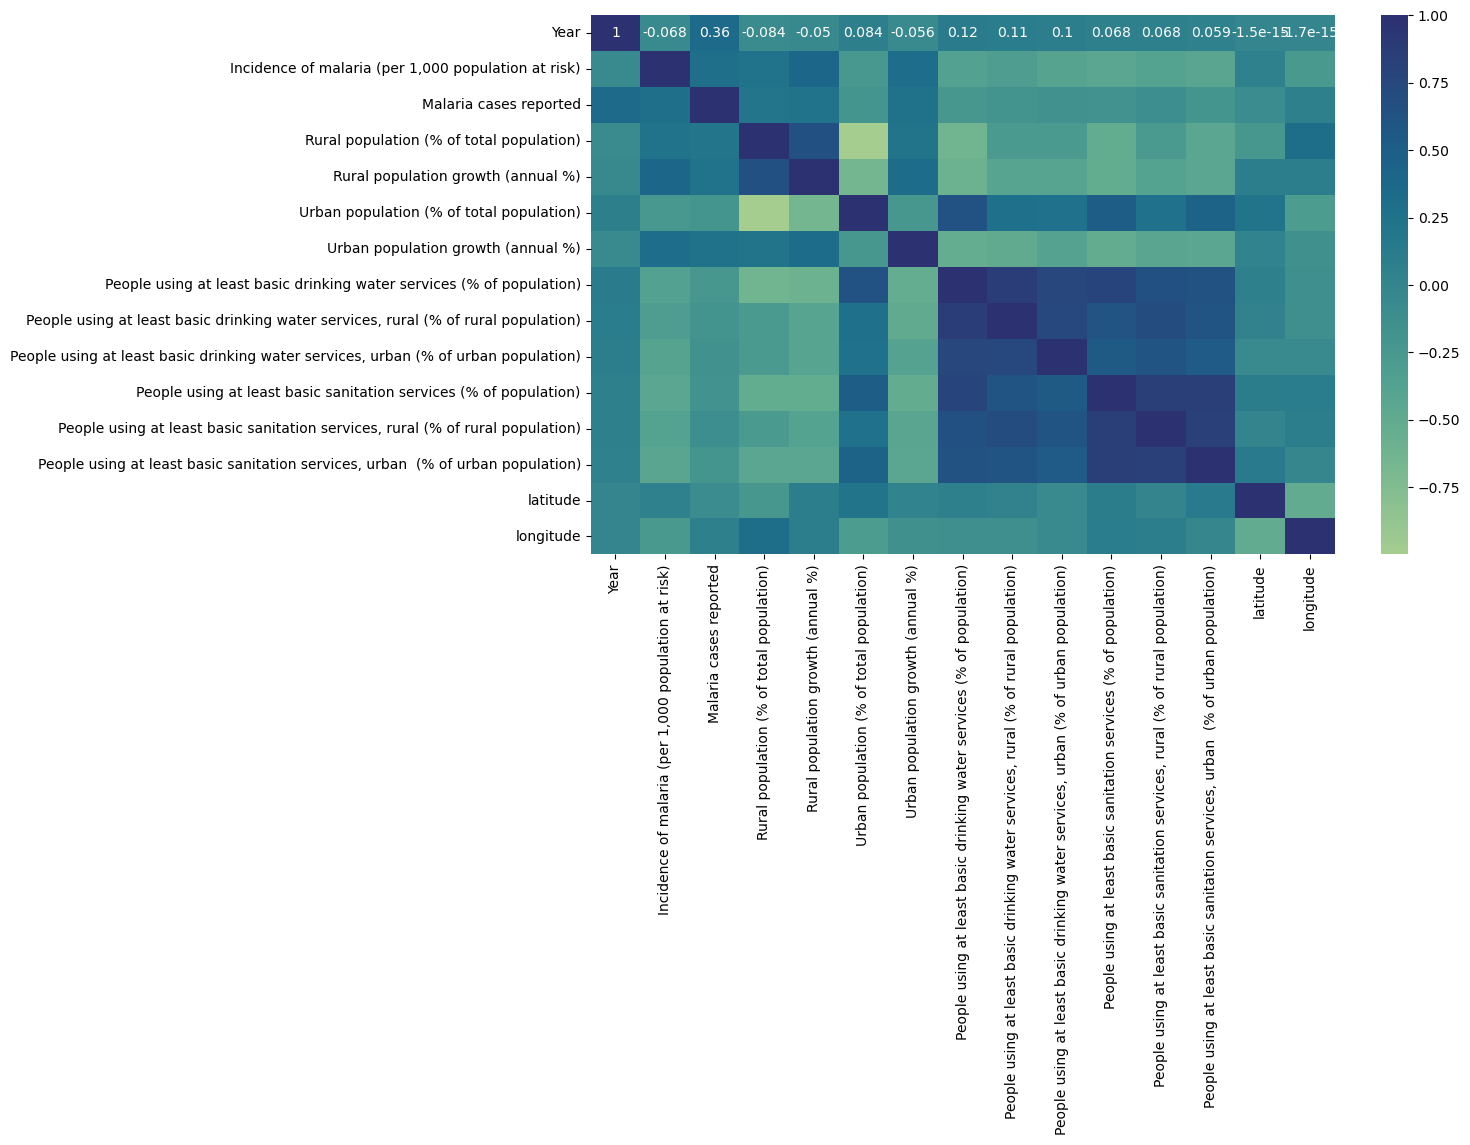

In [109]:
plt.figure(figsize=(12,7))

sns.heatmap(malaria_data.corr(),annot=True,cmap='crest')

# sns.heatmap(malaria_data.corr())

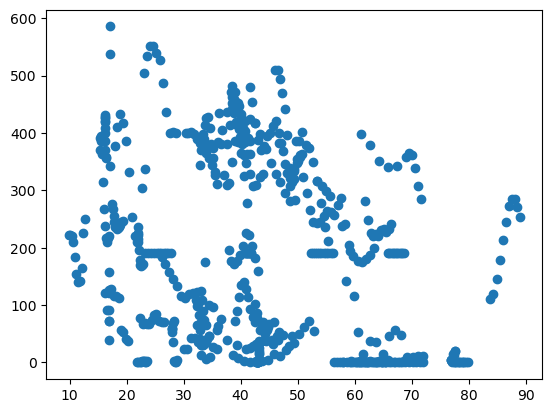

In [110]:
plt.scatter(data=malaria_data, x='Urban population (% of total population)', y='Incidence of malaria (per 1,000 population at risk)')

In [111]:
#TRAINING A LINEAR REGRESSION
X = malaria_data[[ 'Malaria cases reported','Urban population (% of total population)','Urban population growth (annual %)','Rural population (% of total population)','Rural population growth (annual %)']]
Y = malaria_data['Incidence of malaria (per 1,000 population at risk)']

In [112]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=80)

In [114]:
X_train.head(7)

Malaria cases reported  Urban population (% of total population)  \
418                  1754.0                                     69.21   
194                  6367.0                                     46.59   
138                     0.0                                     15.43   
225                181126.0                                     22.05   
274               3858046.0                                     25.77   
232                 22466.0                                     67.49   
297               1412629.0                                     48.58   

     Urban population growth (annual %)  \
418                                3.34   
194                                4.88   
138                                3.54   
225                                3.68   
274                                5.24   
232                                6.80   
297                                3.71   

     Rural population (% of total population)  \
418                                     30.79   
194                                     53.41   
138                                     84.57   
225                                     77.95   
274                                     74.23   
232                                     32.51   
297                                     51.42   

     Rural population growth (annual %)  
418                               -1.34  
194                                1.25  
138                                2.75  
225                                3.28  
274                                2.23  
232                               -0.17  
297                                2.14

In [115]:
#CREATING AND TRAINING THE MODEL
from sklearn.linear_model import LinearRegression

In [116]:
lm = LinearRegression()

In [117]:
lm.fit(X_train,Y_train)

LinearRegression()

In [118]:
#MODEL EVALUATION
# print the intercept

print(lm.intercept_)

-155485.61524117208


In [119]:
lm.coef_

array([1.29054607e-05, 1.55546392e+03, 1.85600459e+01, 1.55540675e+03,
       3.80385706e+01])

In [120]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Malaria cases reported                       0.000013
Urban population (% of total population)  1555.463921
Urban population growth (annual %)          18.560046
Rural population (% of total population)  1555.406750
Rural population growth (annual %)          38.038571

In [121]:
# Y=MX+C (EQUATION OF THE LINE)
((75*0.136375)+(25*0.058946)+(0*0.037546))+45.85267222774047

57.55444722774047

In [122]:
#PREDICTIONS FROM OUR MODEL
predictions = lm.predict(X_test)

In [123]:
compare = pd.DataFrame({'preds':predictions,'Y_test':Y_test})

In [124]:
compare.head(15)

preds  Y_test
139  237.679112  374.56
60    74.044273    0.28
535  213.006411  324.86
128  125.579049  145.95
329  321.763301  140.59
154  321.401697  255.07
341  177.230812   15.03
277  186.486183  245.13
313  198.347723  447.47
181  254.060788  128.40
557  177.652666   33.97
21   194.000199  316.01
57    86.742390    1.93
417  220.057105  219.81
406   57.224845    0.00

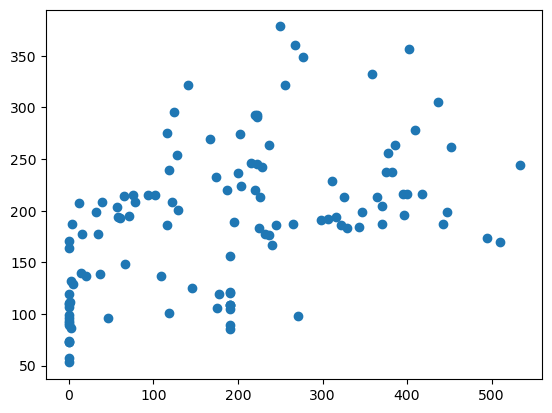

In [125]:
plt.scatter(Y_test,predictions)

F:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


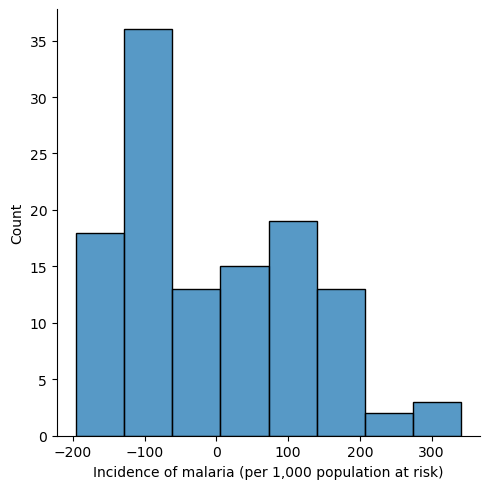

In [126]:
#RESIDUAL HISTOGRAM
sns.displot((Y_test-predictions));

In [127]:
#REGRESSION EVALUATION METRICS
from sklearn import metrics

In [128]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 109.60683361081465
MSE: 15845.367667318144
RMSE: 125.87838443242805


In [129]:
 #Make predictions on the test data
#Y_pred = rf_model.predict(X_test)

In [130]:
# Evaluate the model's performance
r2 = lm.score(X_test, Y_test)

In [131]:
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 0.25
